In [61]:
import sys
!{sys.executable} -m pip install opencv-python

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cv2

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_

In [63]:
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )
def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a.astype(float), axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [64]:
def rgb2ycbcr(im):
    xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = im.dot(xform.T)
    ycbcr[:,:,[1,2]] += 128
    return np.uint8(ycbcr)

def ycbcr2rgb(im):
    xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
    rgb = im.astype(float)
    rgb[:,:,[1,2]] -= 128
    rgb = rgb.dot(xform.T)
    np.putmask(rgb, rgb > 255, 255)
    np.putmask(rgb, rgb < 0, 0)
    return np.uint8(rgb)

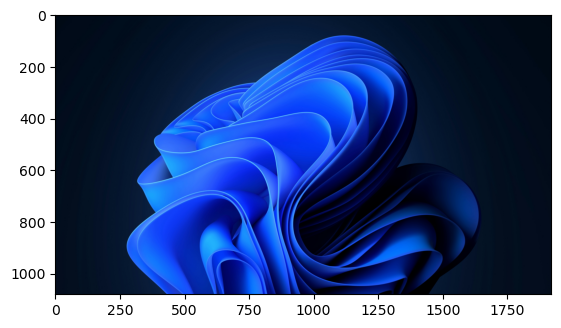

In [65]:
# Load an image and convert to YCbCr
image = plt.imread('./image.bmp')
image_ycbcr = rgb2ycbcr(image)
image = ycbcr2rgb(image_ycbcr)
plt.imshow(image)

In [ ]:
# Perform blockwise DCT
imsize = image_ycbcr.shape
dct = np.zeros(imsize)


for channel in range(0,3):
    for i in r_[:imsize[0]:8]:
        for j in r_[:imsize[1]:8]:
            dct[i:(i+8),j:(j+8),channel] = dct2( image_ycbcr[i:(i+8),j:(j+8),channel] )
        
idct = np.zeros(imsize)
for channel in range(0,3):
    for i in r_[:imsize[0]:8]:
        for j in r_[:imsize[1]:8]:
            idct[i:(i+8),j:(j+8),channel] = idct2( dct[i:(i+8),j:(j+8),channel] )

image_rgb = ycbcr2rgb(idct)

# Display the result
plt.imshow(image_rgb)
plt.show()
